In [1]:
import ast
import glob
import json
import re
from collections import OrderedDict

import matplotlib.pyplot as plt
import numpy as np

In [15]:
NN_files = glob.glob("experiment_nn_5_istella-*.out")

NN_NDCGs = []
NN_runtimes = []
for file in NN_files:
    with open(file, "r") as f:
        line = f.readlines()
    ndcg_value = []
    time = []
    for dic in eval(line[0]):
        ndcg_value.append(dic["test result"]["dataset normalized maximum likelihood"])
        time.append(dic["total time"])
    NN_runtimes.append(time)
    NN_NDCGs.append(ndcg_value)

In [16]:
XGBoost_files = glob.glob("experiment_xgboost_log_5_istella-*.out")

XGBoost_NDCGs = []
XGBoost_runtimes = []
for file in XGBoost_files:
    with open(file, "r") as f:
        lines = f.readlines()
    time = []
    for i in eval(lines[1]):
        time.append(i["time"])
    XGBoost_runtimes.append(time)
    XGBoost_NDCGs.append(eval(lines[0])["test"]["NDCG@5"])

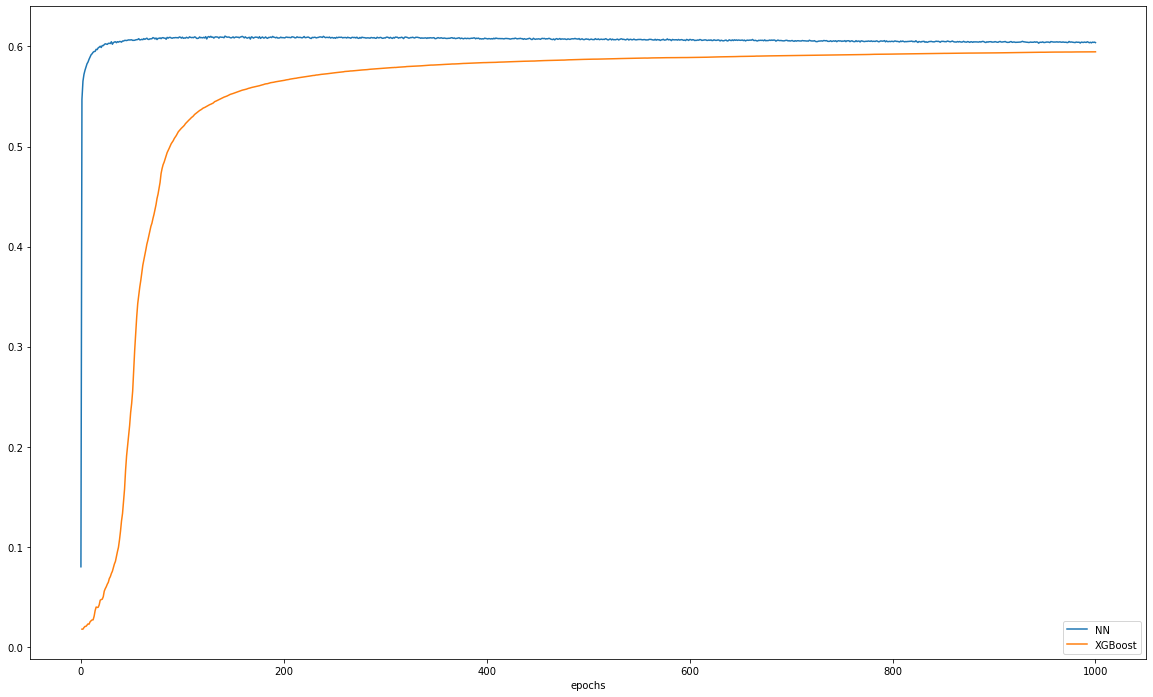

In [17]:
plt.figure(figsize=(20, 12))
plt.plot(
    np.arange(0, 1001), np.mean(np.array(NN_NDCGs), axis=0), label="NN",
)
# plt.plot(
#     np.arange(0, 501), np.mean(np.array(NN_log_NDCGs), axis=0), label="NN_log",
# )
plt.plot(
    np.arange(1, 1001), np.mean(np.array(XGBoost_NDCGs), axis=0), label="XGBoost",
)
# plt.plot(
#     np.arange(1, 1001),
#     np.mean(np.array(XGBoost_shared_NDCGs), axis=0),
#     label="XGBoost_shared",
# )
# plt.plot(
#     np.arange(1, 1001),
#     np.mean(np.array(lambdamart_NDCGs), axis=0),
#     label="LambdaMART",
# )
# plt.plot(
#     np.arange(1, 501), np.mean(np.array(XGBoost_log_NDCGs), axis=0), label="XGBoost_log",
# )
# plt.plot(
#     np.arange(1, 1001),
#     np.mean(np.array(Without_Hessian_NDCGs), axis=0),
#     label="Without_Hessian",
# )
# plt.ylim(0.67, 0.78)
plt.legend()
plt.xlabel("epochs")
plt.show()

In [19]:
np.array(XGBoost_NDCGs)[:,99]

array([0.539102, 0.516711, 0.522381, 0.536363, 0.481308])